In [2]:
# import matplotlib and numpy libraries
# you should run it only once
import matplotlib.pyplot as plt
import numpy as np

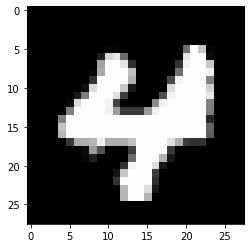

In [3]:
train_images = np.loadtxt('data/train_images.txt') # incarcam imaginile
train_labels = np.loadtxt('data/train_labels.txt').astype(np.int8) # incarcam etichetele avand tipul de date int

test_images = np.loadtxt('data/test_images.txt') # incarcam imaginile
test_labels = np.loadtxt('data/test_labels.txt').astype(np.int8) # incarcam etichetele avand tipul de date int

image = train_images[0, :] # prima imagine
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [4]:
class Knn_classifier:
    def __init__(self, train_images, train_labels):
        # Ex. 1
        self.train_images = train_images
        self.train_labels = train_labels
    
    def classify_image(self, test_image, num_neighbors=3, metric='l2'):
        # Ex 2
        if metric == 'l2':
            distances = np.sqrt(np.sum(np.square(self.train_images-test_image), axis=1))
            
            best_indices = np.argsort(distances)
            top_k_indices = best_indices[:num_neighbors]
            
            tok_k_labels = self.train_labels[top_k_indices]
            
            counts = np.bincount(tok_k_labels)
            pred_label = np.argmax(counts)
            
            return pred_label
        elif metric == 'l1':
            distances = np.sum(np.abs(self.train_images-test_image), axis=1)
            
            best_indices = np.argsort(distances)
            top_k_indices = best_indices[:num_neighbors]
            
            tok_k_labels = self.train_labels[top_k_indices]
            
            counts = np.bincount(tok_k_labels)
            pred_label = np.argmax(counts)
            
            return pred_label
        else:
            raise ValueError()
    
    def classify_images(self, test_images, num_neighbors=3, metric='l2'):
        num_test_images = test_images.shape[0] 
        predicted_labels = np.zeros((num_test_images), np.int8)
        
        for i in range(num_test_images): 
            predicted_labels[i] = self.classify_image(test_images[i,:], num_neighbors = num_neighbors, metric = metric)
        
        return predicted_labels
    
    # c. Define a function to compute the accurracy score given the predicted labels and the ground-truth labels.
    def accuracy_score(self, y_pred, y_true):
        # write your code here
        return (y_pred == y_true).mean()
        return np.sum(y_pred == y_true) / len(y_pred)

In [5]:
# Ex 3
knn_classifier = Knn_classifier(train_images=train_images, train_labels=train_labels)

pred = knn_classifier.classify_images(test_images, num_neighbors=3, metric='l2')
acc_score = knn_classifier.accuracy_score(pred, test_labels)
with open(f'predictii_3nn_l2_mnist.txt', 'w') as out_file:
    out_file.write(f'{acc_score}')

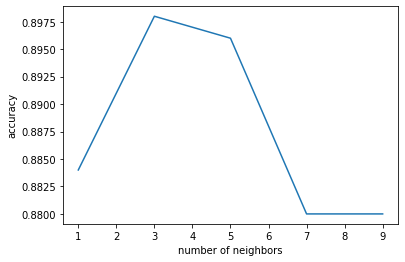

In [6]:
# Ex 4, a
neighbors = [1, 3, 5, 7, 9]
accs_l2 = []
for k in neighbors:
    pred = knn_classifier.classify_images(test_images, num_neighbors=k, metric='l2')
    acc_score = knn_classifier.accuracy_score(pred, test_labels)
    accs_l2.append(acc_score)
    
    with open(f'acuratete_l2.txt', 'a') as out_file:
        out_file.write(f'k={k}: {acc_score} \n')
        
plt.xlabel('number of neighbors')
plt.ylabel('accuracy') 
plt.plot(neighbors, accs_l2)

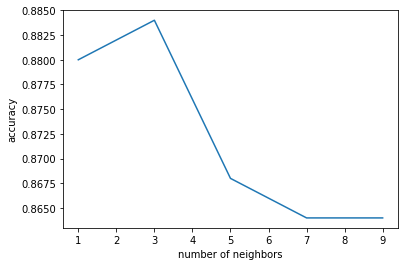

In [7]:
# Ex 4, b
neighbors = [1, 3, 5, 7, 9]
accs_l1 = []
for k in neighbors:
    pred = knn_classifier.classify_images(test_images, num_neighbors=k, metric='l1')
    acc_score = knn_classifier.accuracy_score(pred, test_labels)
    accs_l1.append(acc_score)
    
    with open(f'acuratete_l1.txt', 'a') as out_file:
        out_file.write(f'k={k}: {acc_score} \n')
        
plt.xlabel('number of neighbors')
plt.ylabel('accuracy') 
plt.plot(neighbors, accs_l1)

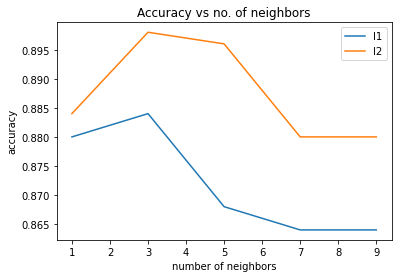

In [8]:
plt.xlabel('number of neighbors')
plt.ylabel('accuracy') 
plt.plot(neighbors, accs_l1, label='l1')
plt.plot(neighbors, accs_l2, label='l2')
plt.title('Accuracy vs no. of neighbors')
plt.legend()